In [35]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('openings.csv')

In [38]:
print(df.head(10))

   Unnamed: 0                                            Opening Colour  \
0           0                 Alekhine Defense, Balogh Variation  white   
1           1               Alekhine Defense, Brooklyn Variation  black   
2           2               Alekhine Defense, Exchange Variation  white   
3           3                Alekhine Defense, Four Pawns Attack  white   
4           4  Alekhine Defense, Four Pawns Attack, Fianchett...  black   
5           5     Alekhine Defense, Four Pawns Attack, Main Line  white   
6           6  Alekhine Defense, Four Pawns Attack, Trifunovi...  black   
7           7                          Alekhine Defense, General  black   
8           8  Alekhine Defense, Hunt Variation, Lasker Simul...  white   
9           9                Alekhine Defense, Maroczy Variation  white   

   Num Games  ECO Last Played  Perf Rating  Avg Player  Player Win %  Draw %  \
0        692  B03  2018-06-22         2247        2225          40.8    24.3   
1        228  

In [44]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1884 non-null   int64  
 1   Opening         1884 non-null   object 
 2   Colour          1884 non-null   object 
 3   Num Games       1884 non-null   int64  
 4   ECO             1884 non-null   object 
 5   Last Played     1884 non-null   object 
 6   Perf Rating     1884 non-null   int64  
 7   Avg Player      1884 non-null   int64  
 8   Player Win %    1884 non-null   float64
 9   Draw %          1884 non-null   float64
 10  Opponent Win %  1884 non-null   float64
 11  Moves           1884 non-null   object 
 12  moves_list      1884 non-null   object 
 13  move1w          1884 non-null   object 
 14  move1b          1869 non-null   object 
 15  move2w          1814 non-null   object 
 16  move2b          1744 non-null   object 
 17  move3w          1628 non-null   o

In [48]:
### Obertures més jugades
top_openings = df.groupby("Opening")["Num Games"].sum().reset_index()
top_openings = top_openings.sort_values(by="Num Games", ascending=False).head(10)

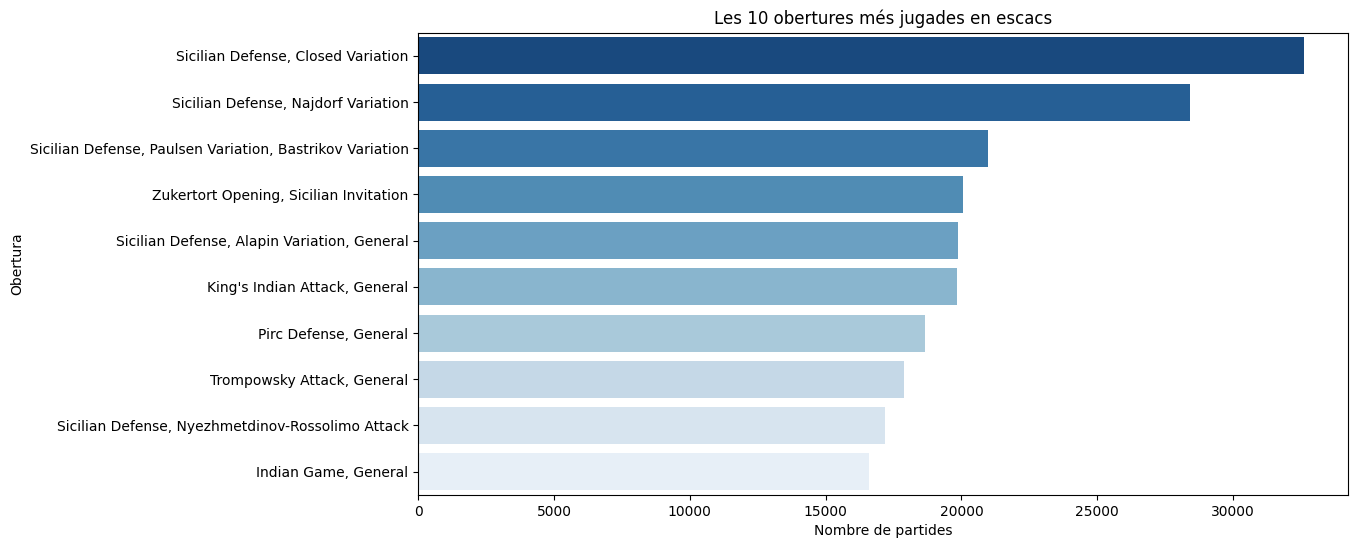

In [41]:
# Gràfic de barres
plt.figure(figsize=(12,6))
sns.barplot(x="Num Games", y="Opening", data=top_openings, hue="Opening", palette="Blues_r", legend=False)
plt.xlabel("Nombre de partides")
plt.ylabel("Obertura")
plt.title("Les 10 obertures més jugades en escacs")
plt.show()

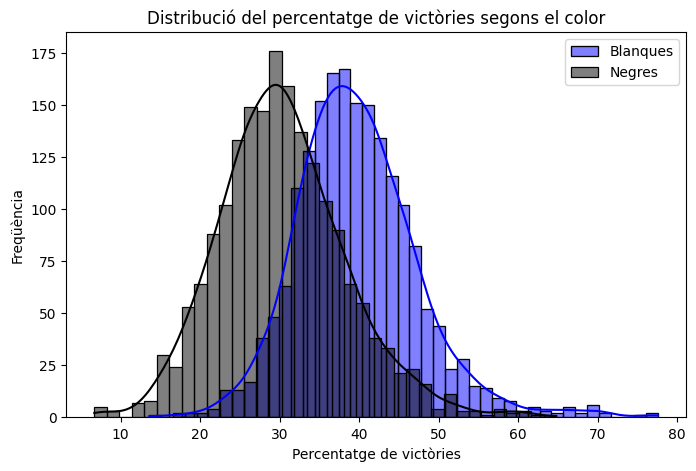

In [59]:
### Percentatge de victòries per color ###
plt.figure(figsize=(8,5))
sns.histplot(df["White_win%"], kde=True, color="blue", label="Blanques")
sns.histplot(df["Black_win%"], kde=True, color="black", label="Negres")
plt.legend()
plt.xlabel("Percentatge de victòries")
plt.ylabel("Freqüència")
plt.title("Distribució del percentatge de victòries segons el color")
plt.show()

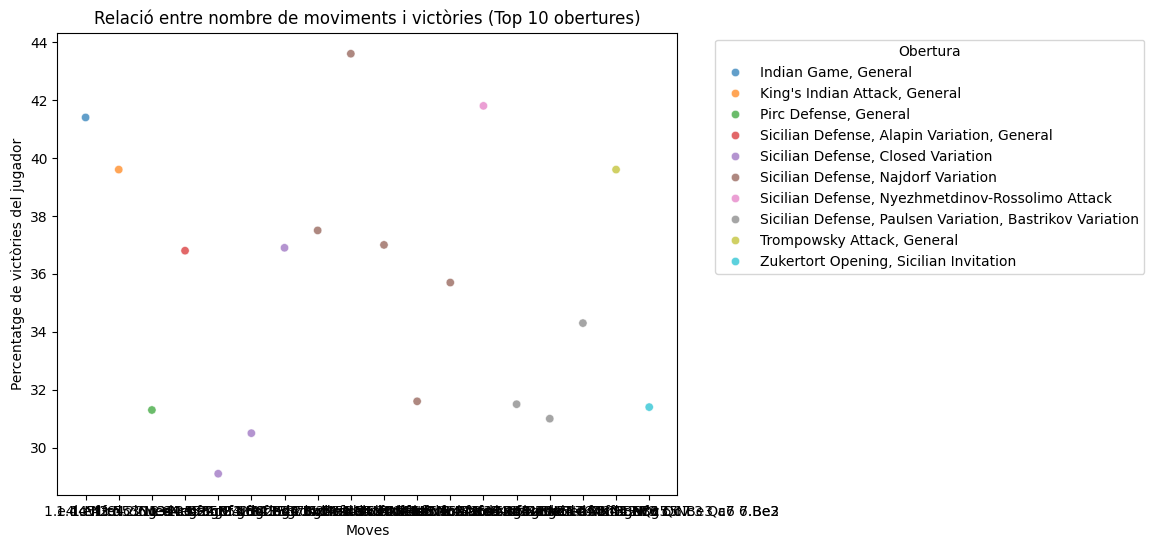

In [60]:
# Seleccionar les 10 obertures més jugades
top_openings = df.groupby("Opening")["Num Games"].sum().nlargest(10).index
df_top = df[df["Opening"].isin(top_openings)]

# Gràfic de dispersió limitat a les 10 obertures més famoses
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_top["Moves"], y=df_top["Player Win %"], hue=df_top["Opening"], alpha=0.7)
plt.ylabel("Percentatge de victòries del jugador")
plt.title("Relació entre nombre de moviments i victòries (Top 10 obertures)")
plt.legend(title="Obertura", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


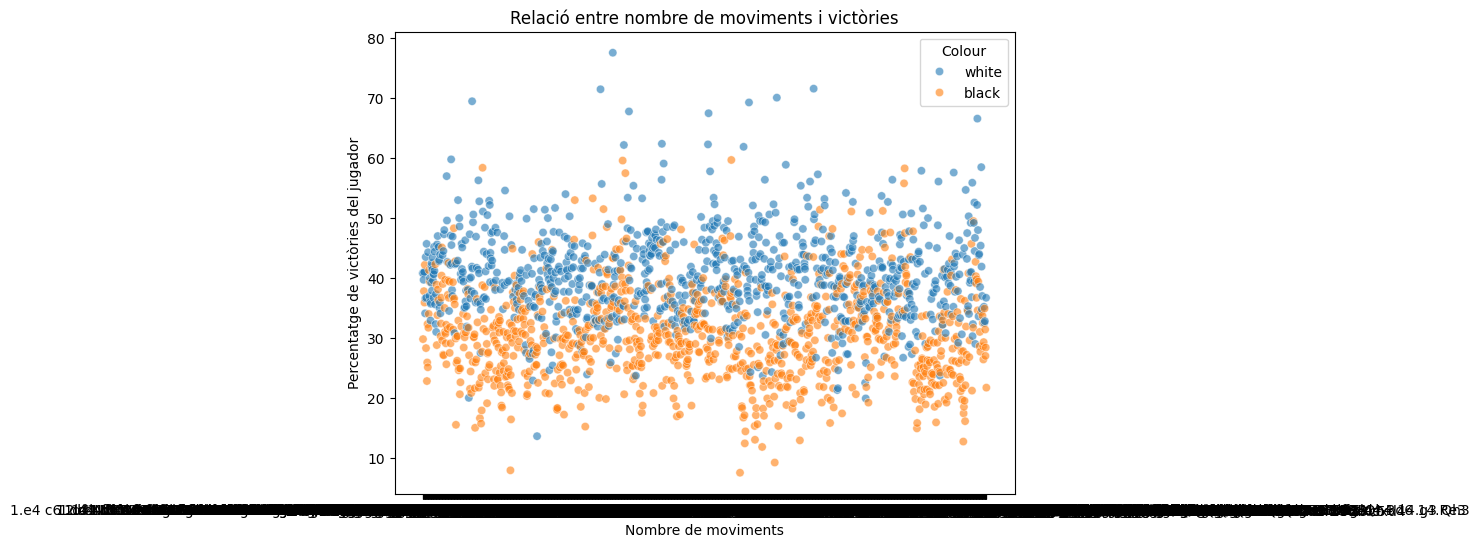

In [61]:
### Relació entre moviments i resultats ###
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Moves"], y=df["Player Win %"], hue=df["Colour"], alpha=0.6)
plt.xlabel("Nombre de moviments")
plt.ylabel("Percentatge de victòries del jugador")
plt.title("Relació entre nombre de moviments i victòries")
plt.show()